## Assignment is below at the bottom

Video 13.1
https://www.youtube.com/watch?v=kIGHE7Cfe1s

Video 13.2
https://www.youtube.com/watch?v=Rm9bJcDd1KU

Video 13.3
https://youtu.be/6HjZk-3LsjE

In [77]:
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

In [78]:

# this is the size of our encoded representations
encoding_dim = 4  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [79]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [80]:
autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/100
235/235 [==============================] - 3s 9ms/step - loss: 0.2505 - val_loss: 0.1888
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1788 - val_loss: 0.1708
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1677 - val_loss: 0.1645
Epoch 4/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1628 - val_loss: 0.1609
Epoch 5/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1596 - val_loss: 0.1583
Epoch 6/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1573 - val_loss: 0.1566
Epoch 7/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1556 - val_loss: 0.1553
Epoch 8/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1541 - val_loss: 0.1537
Epoch 9/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1530 - val_loss: 0.1527
Epoch 10/100
235/235 [==============================] - 2s 11ms/step - loss: 0.1518 -

235/235 [==============================] - 3s 12ms/step - loss: 0.1342 - val_loss: 0.1408
Epoch 81/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1341 - val_loss: 0.1410
Epoch 82/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1340 - val_loss: 0.1409
Epoch 83/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1340 - val_loss: 0.1409
Epoch 84/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1339 - val_loss: 0.1408
Epoch 85/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1339 - val_loss: 0.1407
Epoch 86/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1338 - val_loss: 0.1406
Epoch 87/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1338 - val_loss: 0.1410
Epoch 88/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1337 - val_loss: 0.1408
Epoch 89/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1336 - 

In [11]:
encoded_imgs

array([[38.304043 ,  0.       ,  9.823541 , 22.699774 ],
       [ 4.0672283,  0.       ,  6.457829 ,  2.599104 ],
       [94.89234  ,  0.       , 48.237885 , 22.512798 ],
       ...,
       [20.050169 ,  0.       ,  8.473201 ,  8.569888 ],
       [19.308092 ,  0.       , 15.271025 ,  8.056674 ],
       [ 3.769403 ,  0.       ,  2.7675493,  3.3705957]], dtype=float32)

In [12]:
noise = np.random.normal(20,4, (4,4))
noise_preds = decoder.predict(noise)

1/1 [==============================] - 0s 18ms/step


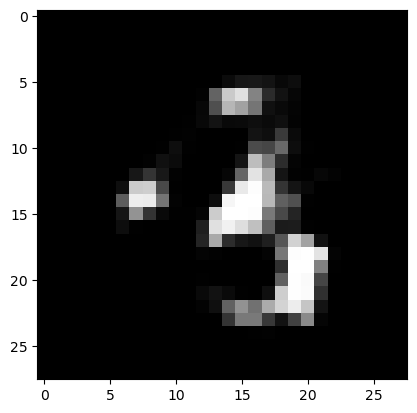

In [81]:
plt.imshow(noise_preds[1].reshape(28,28))

In [14]:
np.max(encoded_imgs)

98.423355

313/313 [==============================] - 0s 1ms/step


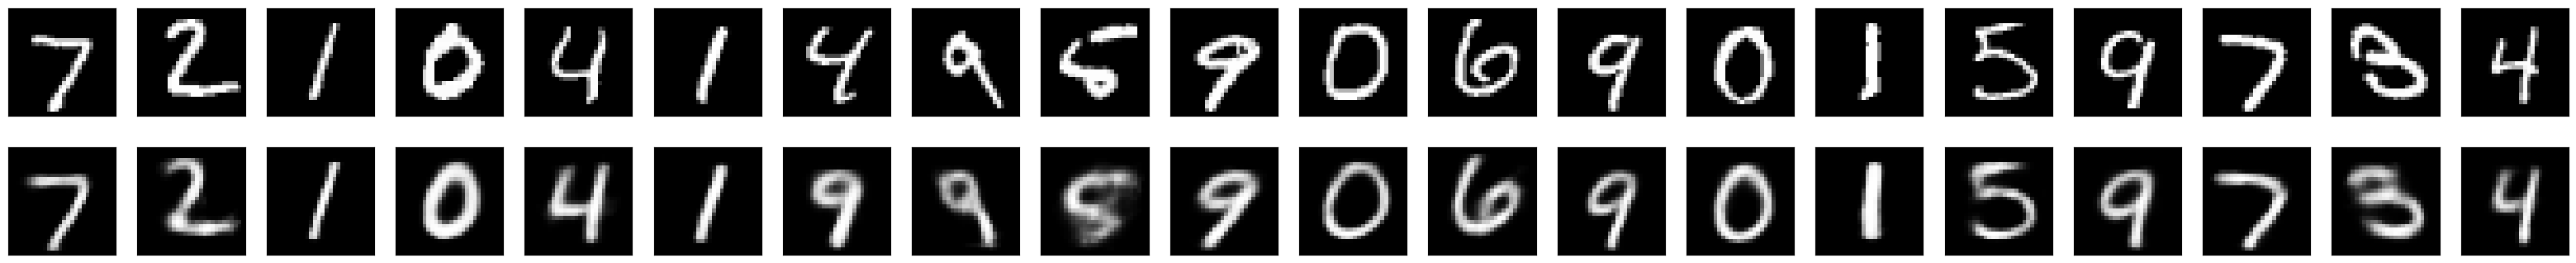

In [82]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
encoded_imgs

array([[38.304043 ,  0.       ,  9.823541 , 22.699774 ],
       [ 4.0672283,  0.       ,  6.457829 ,  2.599104 ],
       [94.89234  ,  0.       , 48.237885 , 22.512798 ],
       ...,
       [20.050169 ,  0.       ,  8.473201 ,  8.569888 ],
       [19.308092 ,  0.       , 15.271025 ,  8.056674 ],
       [ 3.769403 ,  0.       ,  2.7675493,  3.3705957]], dtype=float32)

In [16]:
%matplotlib inline

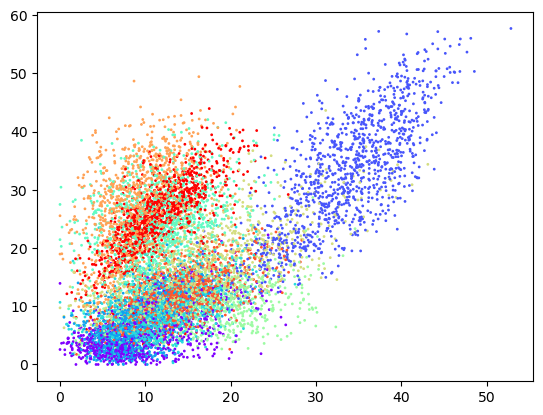

In [83]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,0], s=1, c=ytest, cmap='rainbow')
# plt.show()

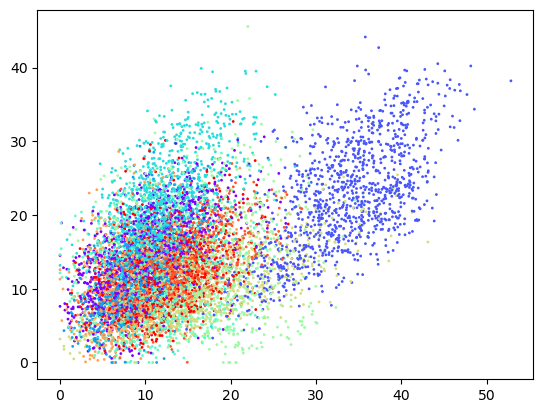

In [84]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')
# plt.show()

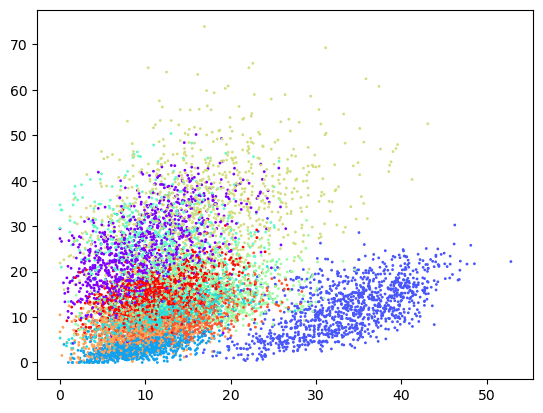

In [85]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')
# plt.show()

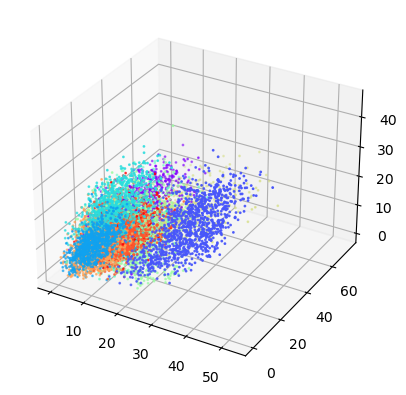

In [86]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_imgs[:,1], encoded_imgs[:,2], encoded_imgs[:,3], c=ytest, cmap='rainbow', s=1)

# Assignment


1. change the `encoding_dim` through various values (`range(2,18,2)` and save the loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot


In [21]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

In [23]:
losses = []
dimensions = [2, 4, 6, 8, 10, 12, 14, 16]
for encoding_dim in dimensions:

    x = input_img = Input(shape=(784,))
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='relu')(x)
    x = Dense(128, activation='relu')(encoded)
    x = Dense(256, activation='relu')(x)
    decoded = Dense(784, activation='sigmoid')(x)
    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)
    encoded_input = Input(shape=(encoding_dim,))
    dcd1 = autoencoder.layers[-1]
    dcd2 = autoencoder.layers[-2]
    dcd3 = autoencoder.layers[-3]
    decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    autoencoder.fit(xtrain, xtrain,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

    loss = autoencoder.evaluate(xtrain, xtrain, verbose = 0)
    losses.append(loss)

Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.2770 - val_loss: 0.2498
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2323 - val_loss: 0.2139
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.2085 - val_loss: 0.2040
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.2010 - val_loss: 0.1981
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1956 - val_loss: 0.1931
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1916 - val_loss: 0.1899
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1886 - val_loss: 0.1873
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1863 - val_loss: 0.1860
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1845 - val_loss: 0.1843
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1832 - val_loss

235/235 [==============================] - 3s 13ms/step - loss: 0.1718 - val_loss: 0.1746
Epoch 32/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1714 - val_loss: 0.1742
Epoch 33/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1713 - val_loss: 0.1741
Epoch 34/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1711 - val_loss: 0.1743
Epoch 35/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1708 - val_loss: 0.1739
Epoch 36/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1705 - val_loss: 0.1738
Epoch 37/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1703 - val_loss: 0.1739
Epoch 38/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1702 - val_loss: 0.1733
Epoch 39/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1701 - val_loss: 0.1733
Epoch 40/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1697 - val_loss:

235/235 [==============================] - 3s 11ms/step - loss: 0.1338 - val_loss: 0.1331
Epoch 12/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1329 - val_loss: 0.1324
Epoch 13/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1321 - val_loss: 0.1316
Epoch 14/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1314 - val_loss: 0.1313
Epoch 15/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1307 - val_loss: 0.1305
Epoch 16/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1300 - val_loss: 0.1300
Epoch 17/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1295 - val_loss: 0.1295
Epoch 18/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1289 - val_loss: 0.1289
Epoch 19/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1283 - val_loss: 0.1287
Epoch 20/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1278 - val_loss:

235/235 [==============================] - 2s 11ms/step - loss: 0.1093 - val_loss: 0.1110
Epoch 42/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1092 - val_loss: 0.1113
Epoch 43/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1090 - val_loss: 0.1111
Epoch 44/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1088 - val_loss: 0.1109
Epoch 45/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1087 - val_loss: 0.1106
Epoch 46/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1086 - val_loss: 0.1105
Epoch 47/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1085 - val_loss: 0.1104
Epoch 48/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1083 - val_loss: 0.1103
Epoch 49/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1082 - val_loss: 0.1103
Epoch 50/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1081 - val_loss:

235/235 [==============================] - 3s 11ms/step - loss: 0.0988 - val_loss: 0.0988
Epoch 22/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0984 - val_loss: 0.0984
Epoch 23/50
235/235 [==============================] - 2s 11ms/step - loss: 0.0980 - val_loss: 0.0987
Epoch 24/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0978 - val_loss: 0.0979
Epoch 25/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0974 - val_loss: 0.0978
Epoch 26/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0972 - val_loss: 0.0975
Epoch 27/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0969 - val_loss: 0.0970
Epoch 28/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0966 - val_loss: 0.0972
Epoch 29/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0964 - val_loss: 0.0968
Epoch 30/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0962 - val_loss:

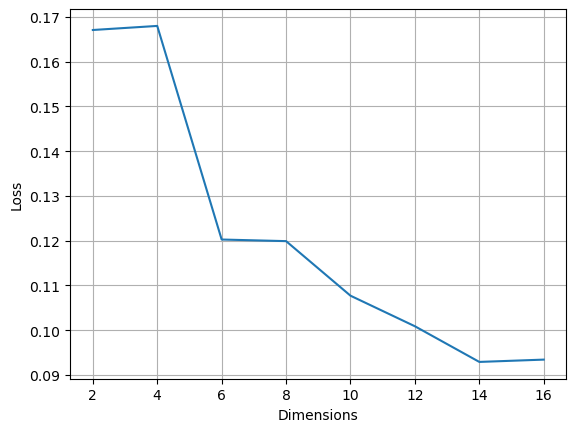

In [24]:
plt.figure()
plt.plot(dimensions, losses)
plt.xlabel('Dimensions')
plt.ylabel('Loss')
plt.grid(True)
plt.show()



2. **_After_** training an autoencoder with `encoding_dim=8`, apply noise (like the previous assignment) to *_only_* the input of the trained autoencoder (not the output). The output images should be without noise. 

Print a few noisy images along with the output images to show they don't have noise.

In [60]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

In [61]:
encoding_dim = 8
x = input_img = Input(shape=(784,))
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [62]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [58]:
noise = np.random.normal(20, 4, (60000,784))
noisy_train = noise + xtrain

In [63]:
autoencoder.fit(noisy_train, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/100
235/235 [==============================] - 3s 9ms/step - loss: 0.2771 - val_loss: 0.6685
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2636 - val_loss: 0.6652
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2633 - val_loss: 0.6572
Epoch 4/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2628 - val_loss: 0.6444
Epoch 5/100
235/235 [==============================] - 3s 11ms/step - loss: 0.2620 - val_loss: 0.6206
Epoch 6/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2611 - val_loss: 0.6024
Epoch 7/100
235/235 [==============================] - 2s 11ms/step - loss: 0.2602 - val_loss: 0.5792
Epoch 8/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2590 - val_loss: 0.5618
Epoch 9/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2583 - val_loss: 0.5504
Epoch 10/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2580 -

235/235 [==============================] - 3s 11ms/step - loss: 0.2536 - val_loss: 0.2696
Epoch 81/100
235/235 [==============================] - 3s 12ms/step - loss: 0.2538 - val_loss: 0.2728
Epoch 82/100
235/235 [==============================] - 3s 12ms/step - loss: 0.2538 - val_loss: 0.2701
Epoch 83/100
235/235 [==============================] - 3s 12ms/step - loss: 0.2539 - val_loss: 0.2714
Epoch 84/100
235/235 [==============================] - 3s 11ms/step - loss: 0.2536 - val_loss: 0.2714
Epoch 85/100
235/235 [==============================] - 3s 11ms/step - loss: 0.2534 - val_loss: 0.2717
Epoch 86/100
235/235 [==============================] - 3s 11ms/step - loss: 0.2536 - val_loss: 0.2711
Epoch 87/100
235/235 [==============================] - 3s 12ms/step - loss: 0.2535 - val_loss: 0.2706
Epoch 88/100
235/235 [==============================] - 3s 12ms/step - loss: 0.2536 - val_loss: 0.2701
Epoch 89/100
235/235 [==============================] - 3s 11ms/step - loss: 0.2535 - 

313/313 [==============================] - 0s 1ms/step


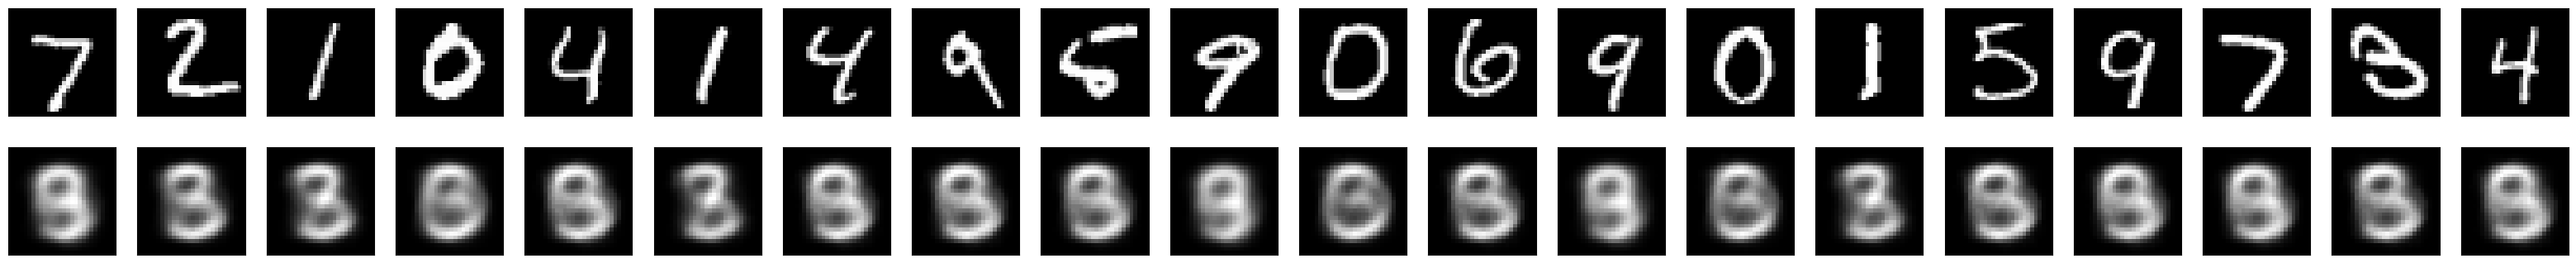

In [73]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

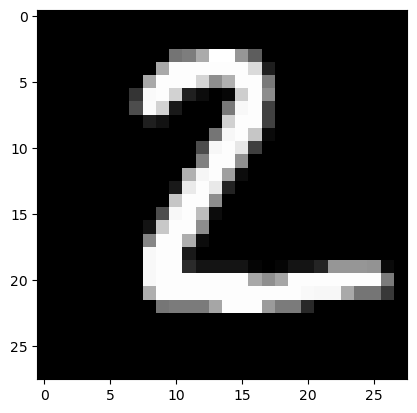

In [71]:
plt.imshow(xtest[1].reshape(28,28))

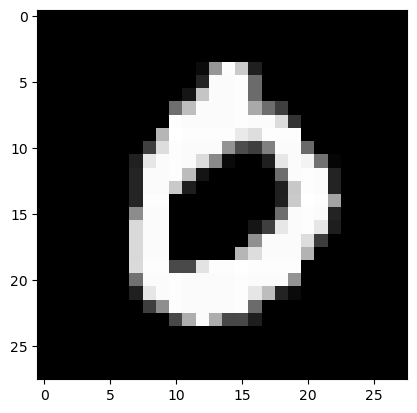

In [75]:
plt.imshow(xtest[3].reshape(28,28))

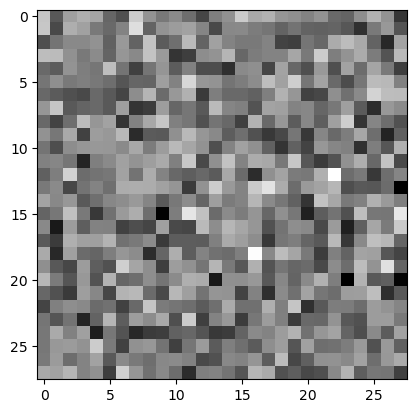

In [76]:
plt.imshow(noisy_train[3].reshape(28,28))